In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004824
2017-03-20,0.002415
2017-03-21,-0.000329


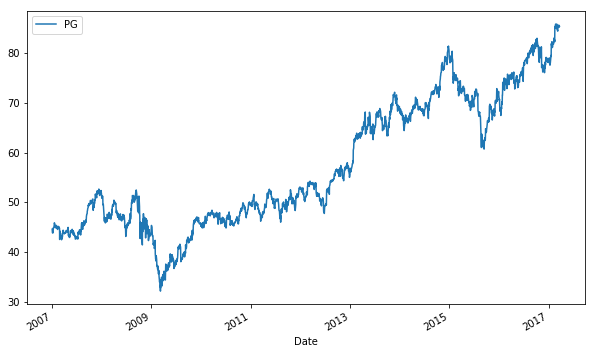

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([ 0.17655059])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in xrange(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[  85.41580963,   85.41580963,   85.41580963, ...,   85.41580963,
          85.41580963,   85.41580963],
       [  86.77778811,   85.37884882,   85.11619137, ...,   83.17693915,
          84.78293658,   86.10874034],
       [  87.15079237,   83.65773441,   83.79247335, ...,   83.81183944,
          83.77586326,   87.61096777],
       ..., 
       [  90.59615034,  117.05868154,   84.34911264, ...,   90.39056332,
          89.28248533,   81.81505956],
       [  89.99675624,  116.32766633,   83.45375192, ...,   89.3573017 ,
          91.42452877,   81.5576014 ],
       [  88.74053042,  115.49627268,   84.04272642, ...,   90.53183842,
          91.69110761,   81.26536508]])

In [13]:
S.shape

(251L, 10000L)

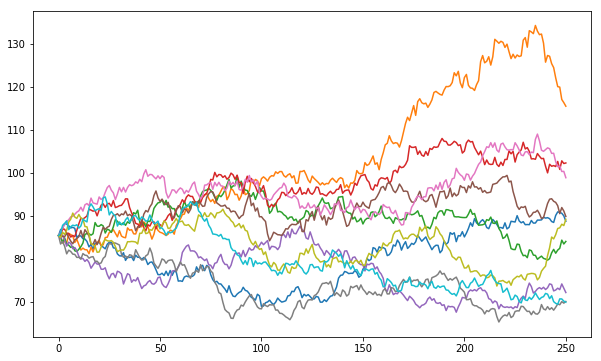

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([ 0.        ,  5.49627268,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [17]:
p.shape

(10000L,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.78893926091392341